In [249]:
import PyMKF
import json
import pprint
import pandas as pd
import matplotlib.pyplot as plt

In [250]:
manufacturers_list = PyMKF.get_available_core_manufacturers()
manufacturers_list

['Ferroxcube',
 'Fair-Rite',
 'Magnetics',
 'Acme',
 'DMEGC',
 'Micrometals',
 'Shandong Jianuo',
 'TDK',
 'Sinomag',
 'TDG']

# Material properties section

In [251]:
# get all the methods of PyMKF
methods = dir(PyMKF)
# print all the methods including word material
material_funs = [method for method in methods if 'material' in method]
material_funs


['find_core_material_by_name',
 'find_insulation_material_by_name',
 'find_wire_material_by_name',
 'get_available_core_materials',
 'get_core_material_names',
 'get_core_material_names_by_manufacturer',
 'get_core_material_steinmetz_coefficients',
 'get_core_materials',
 'get_insulation_material_names',
 'get_insulation_materials',
 'get_material_data',
 'get_material_permeability',
 'get_material_resistivity',
 'get_wire_material_names',
 'get_wire_materials']

In [252]:
PyMKF.get_available_core_materials('TDK')

['N27',
 'N30',
 'N41',
 'N49',
 'N51',
 'N72',
 'N87',
 'N88',
 'N92',
 'N95',
 'N96',
 'N97',
 'PC200',
 'PC47',
 'PC95']

# List the core material by manufacturer
Using the manufacturer is possible to find the material name available in the database.

In [253]:
PyMKF.get_core_material_names_by_manufacturer('Ferroxcube')

['3C90',
 '3C91',
 '3C92',
 '3C92A',
 '3C94',
 '3C95',
 '3C95A',
 '3C95F',
 '3C96',
 '3C97',
 '3C98',
 '3C99',
 '3F3',
 '3F36',
 '3F4',
 '3F46',
 '4F1']

# steinmetz coefficient
- [] what are the steinmetz coefficients for the core material?
- [] how do you calculate the core loss for a given core material?
  - [] steinmetz equation
  - [] IGSE
  - [] IGSE wit DC bias
  - [] neural network

## steinmetz coefficients in Openmagnetics
the implemented fitting coefficients in Openmagnetics is according to 
#TODO: references
```mathjax
\begin{equation}
P_{\text{core}} = K_{\text{core}} \cdot f^{\alpha} \cdot B^{\beta} \cdot V^{\gamma}
\end{equation}
```
where:



In [254]:
d_mat = {}
for man in manufacturers_list:
    d_mat[man] = {}  # Initialize the dictionary for each manufacturer
    material_man = PyMKF.get_core_material_names_by_manufacturer(man)
    for mat in material_man:
        d_mat[man][mat] = PyMKF.get_core_material_steinmetz_coefficients(mat, 100e3)

pprint.pprint(d_mat)

{'Acme': {'A07': {'data': 'Exception: Material A07 does not have '
                          'method:steinmetz'}},
 'DMEGC': {'DMR95': {'data': 'Exception: Material DMR95 does not have '
                             'method:steinmetz'},
           'DMR95B': {'data': 'Exception: Material DMR95B does not have '
                              'method:steinmetz'}},
 'Fair-Rite': {'61': {'alpha': 1.338203696,
                      'beta': 3.094716093,
                      'ct0': 18.1393776,
                      'ct1': -0.453352804,
                      'ct2': -0.001590982022,
                      'k': 6.851014813,
                      'maximumFrequency': 3500000.0,
                      'minimumFrequency': 2000000.0},
               '67': {'alpha': 1.524051931,
                      'beta': 2.519228791,
                      'ct0': 0.3649497827,
                      'ct1': 0.002804091918,
                      'ct2': 2.646245692e-05,
                      'k': 3.6338258,
              

In [255]:
import pandas as pd

data = d_mat
# Create a list to store the flattened data
rows = []

# Iterate through the nested dictionary
for manufacturer, materials in data.items():
    for material, properties in materials.items():
        row = {
            'Manufacturer': manufacturer,
            'Material': material,
            'alpha': None,
            'beta': None,
            'k': None,
            'ct0': None,
            'ct1': None,
            'maximumFrequency': None,
            'minimumFrequency': None,
            'data': None
        }
        
        # If properties is not an exception, update the row with available data
        if isinstance(properties, dict) and 'data' not in properties:
            row.update(properties)
            
        rows.append(row)

# Create DataFrame
df_all_mats_steinmetz = pd.DataFrame(rows)

# Reorder columns as requested
columns = ['Manufacturer', 'Material', 'alpha', 'beta', 'k', 'ct0', 'ct1', 
          'maximumFrequency', 'minimumFrequency']
df_all_mats_steinmetz = df_all_mats_steinmetz[columns]

df_all_mats_steinmetz = df_all_mats_steinmetz.sort_values(by=['Material'])
df_all_mats_steinmetz = df_all_mats_steinmetz.dropna(subset=['alpha', 'beta', 'k', 'ct0', 'ct1', 'maximumFrequency', 'minimumFrequency'])
df_all_mats_steinmetz

,Manufacturer,Material,alpha,beta,k,ct0,ct1,maximumFrequency,minimumFrequency
0,Ferroxcube,3C90,1.46e+00,2.75e+00,3.20e+00,2.45e+00,3.10e-02,2.00e+05,1.00e+00
1,Ferroxcube,3C91,1.40e+00,2.50e+00,3.50e+00,8.80e-01,1.30e-02,1.00e+05,1.00e+00
2,Ferroxcube,3C92,1.19e+00,2.65e+00,2.65e+01,3.75e+00,5.43e-02,1.00e+05,1.00e+00
3,Ferroxcube,3C92A,1.48e+00,2.49e+00,2.10e+00,1.11e+00,1.84e-02,2.50e+05,1.00e+00
4,Ferroxcube,3C94,1.42e+00,2.88e+00,3.53e+00,1.97e+00,2.23e-02,1.50e+05,1.00e+00
5,Ferroxcube,3C95,1.04e+00,2.44e+00,9.22e+01,1.33e+00,7.94e-03,1.50e+05,1.00e+00
6,Ferroxcube,3C95A,1.60e+00,2.80e+00,3.64e-01,6.90e-01,1.73e-03,3.50e+05,1.00e+00
7,Ferroxcube,3C95F,1.62e+00,2.90e+00,3.07e-01,7.00e-01,1.78e-03,3.00e+05,1.00e+00
8,Ferroxcube,3C96,1.34e+00,2.66e+00,5.12e+00,6.56e+00,1.10e-01,1.00e+05,1.00e+00
9,Ferroxcube,3C97,1.16e+00,2.80e+00,4.24e+01,1.47e+00,1.10e-02,1.50e+05,1.00e+00


In [256]:
# Create a dictionary for different format specifications
format_dict = {
    'alpha': '{:.3f}',
    'beta': '{:.3f}',
    'k': '{:.3f}',
    'ct0': '{:.2e}',
    'ct1': '{:.2e}',
    'maximumFrequency': '{:.2e}',
    'minimumFrequency': '{:.2e}'
}

# Create different styles for different columns
df_style = df_all_mats_steinmetz.style\
    .background_gradient(
        cmap='RdYlGn_r',
        low=0,
        axis=0,
        subset=['alpha', 'beta', 'k']
    )\
    .background_gradient(
        cmap='Blues',
        low=0,
        axis=0,
        subset=['ct0', 'ct1']
    )\
    .background_gradient(
        cmap='Oranges',
        low=0,
        axis=0,
        subset=['maximumFrequency', 'minimumFrequency']
    )\
    .format(format_dict)

display(df_style)

,Manufacturer,Material,alpha,beta,k,ct0,ct1,maximumFrequency,minimumFrequency
0,Ferroxcube,3C90,1.460,2.750,3.200,2.45e+00,3.10e-02,2.00e+05,1.00e+00
1,Ferroxcube,3C91,1.400,2.500,3.500,8.80e-01,1.30e-02,1.00e+05,1.00e+00
2,Ferroxcube,3C92,1.195,2.650,26.520,3.75e+00,5.43e-02,1.00e+05,1.00e+00
3,Ferroxcube,3C92A,1.475,2.492,2.103,1.11e+00,1.84e-02,2.50e+05,1.00e+00
4,Ferroxcube,3C94,1.420,2.885,3.530,1.97e+00,2.23e-02,1.50e+05,1.00e+00
5,Ferroxcube,3C95,1.045,2.440,92.166,1.33e+00,7.94e-03,1.50e+05,1.00e+00
6,Ferroxcube,3C95A,1.601,2.798,0.364,6.90e-01,1.73e-03,3.50e+05,1.00e+00
7,Ferroxcube,3C95F,1.619,2.896,0.307,7.00e-01,1.78e-03,3.00e+05,1.00e+00
8,Ferroxcube,3C96,1.340,2.665,5.121,6.56e+00,1.10e-01,1.00e+05,1.00e+00
9,Ferroxcube,3C97,1.160,2.800,42.366,1.47e+00,1.10e-02,1.50e+05,1.00e+00


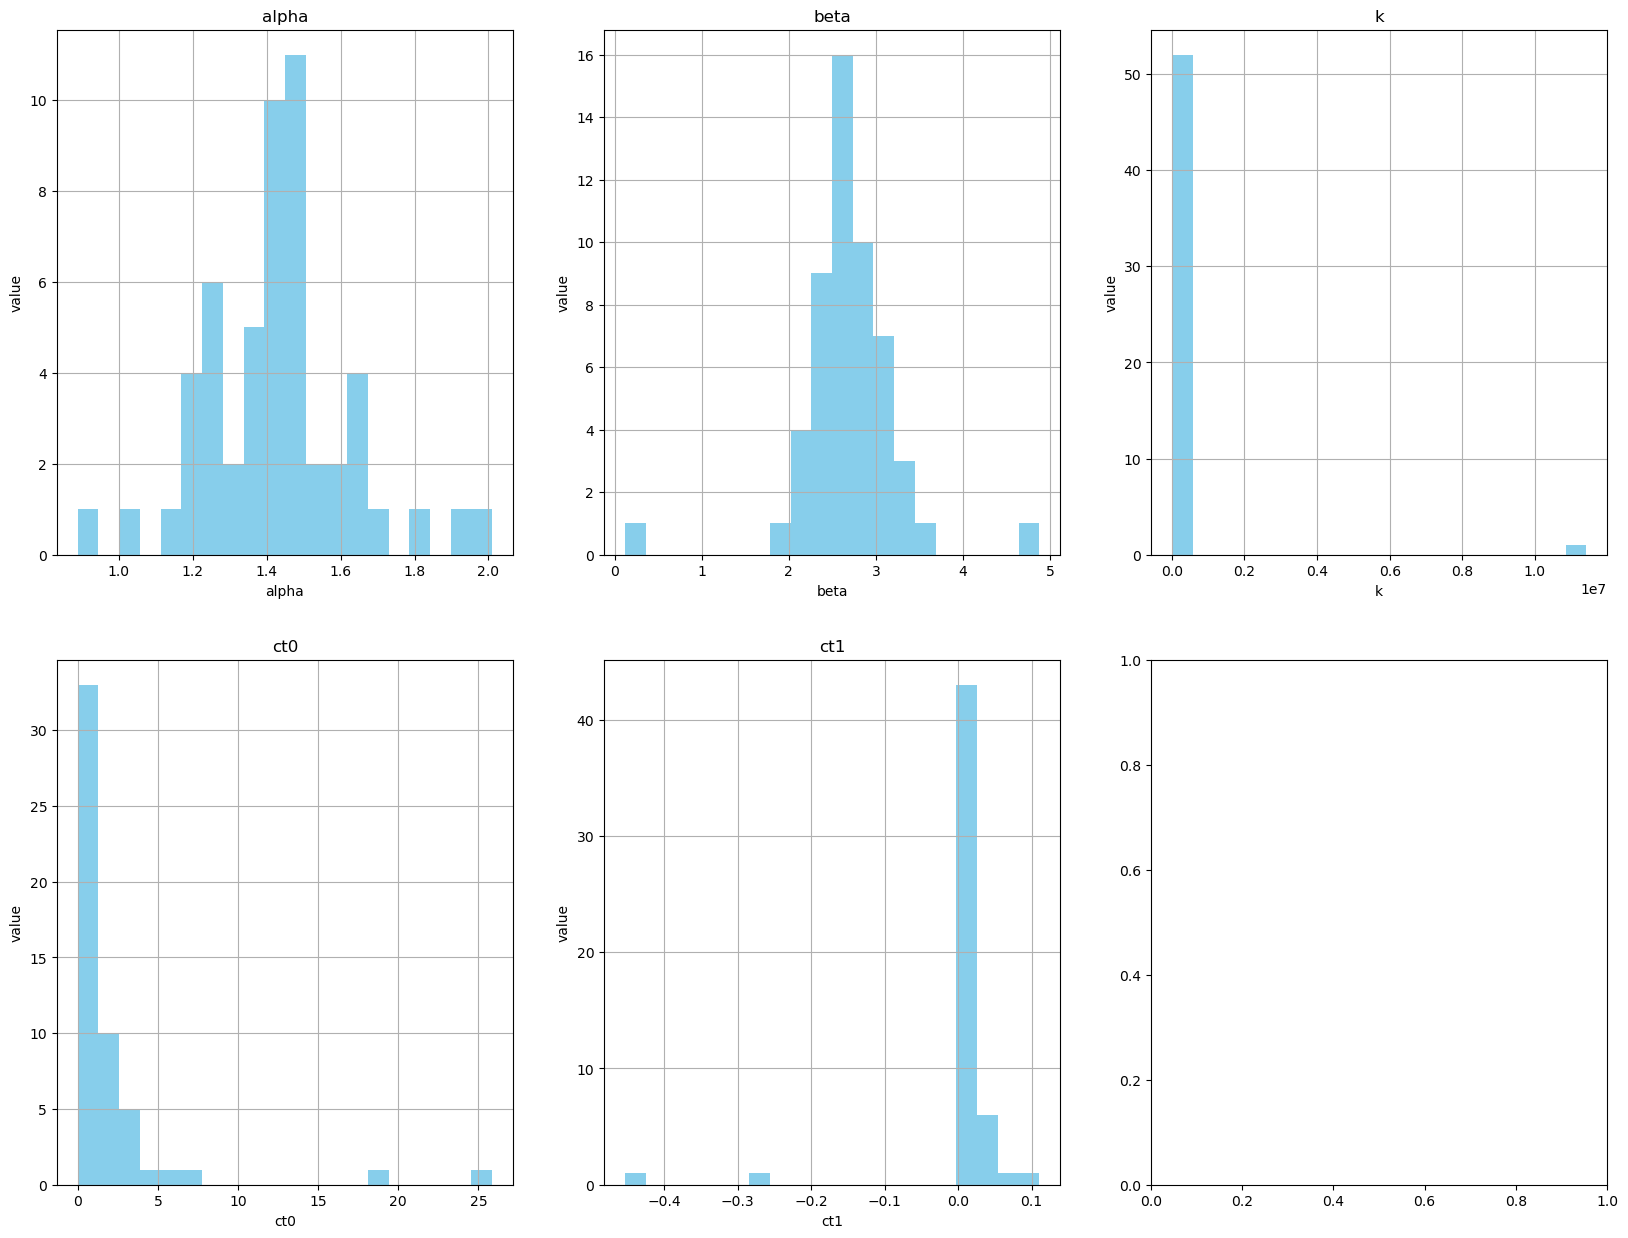

In [257]:
# Plot the data to analyze the statistics distribution of each column
# Create a figure and axis
fig, axs = plt.subplots(2, 3, figsize=(20, 15))

# Iterate through the columns and plot the data
for i, col in enumerate(df_all_mats_steinmetz.columns[2:-2]):
    ax = axs[i//3, i%3]
    ax.hist(df_all_mats_steinmetz[col], bins=20, color='skyblue')
    ax.set_title(col)
    ax.set_xlabel(col)
    ax.set_ylabel('value')
    ax.grid()


In [258]:
import numpy as np
steinmetz_stat = df_all_mats_steinmetz.describe()
steinmetz_stat

,alpha,beta,k,ct0,ct1,maximumFrequency,minimumFrequency
count,5.30e+01,5.30e+01,5.30e+01,5.30e+01,5.30e+01,5.30e+01,5.30e+01
mean,1.43e+00,2.69e+00,2.16e+05,2.04e+00,-1.03e-03,5.73e+05,1.93e+05
std,2.00e-01,5.79e-01,1.57e+06,4.33e+00,7.68e-02,9.43e+05,5.68e+05
min,8.89e-01,1.16e-01,2.00e-02,2.01e-04,-4.53e-01,1.00e+05,1.00e+00
25%,1.29e+00,2.47e+00,3.20e+00,4.88e-03,1.77e-05,1.50e+05,1.00e+00
50%,1.42e+00,2.66e+00,5.90e+00,8.80e-01,3.30e-03,2.00e+05,1.00e+00
75%,1.50e+00,2.88e+00,1.35e+01,2.04e+00,1.84e-02,5.00e+05,7.50e+04
max,2.01e+00,4.88e+00,1.14e+07,2.59e+01,1.10e-01,5.00e+06,3.00e+06


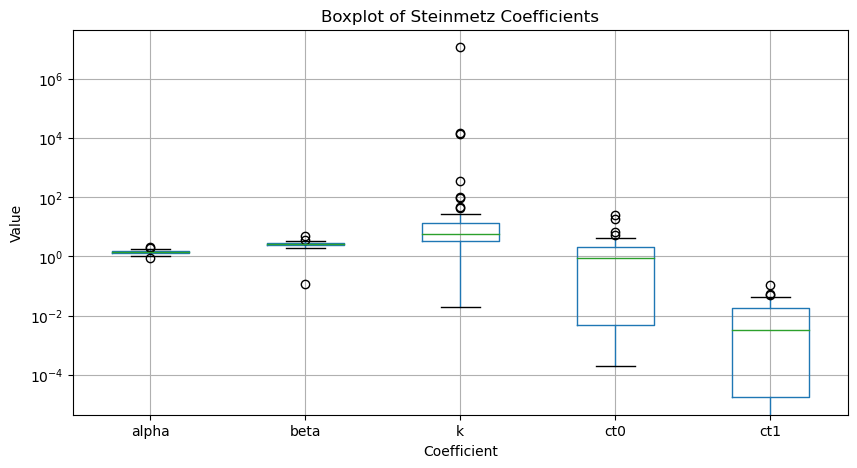

In [259]:
# create a boxplot for df
df_boxplot = df_all_mats_steinmetz[['alpha', 'beta', 'k', 'ct0', 'ct1']]
fig, ax = plt.subplots(figsize=(10, 5))
df_boxplot.boxplot(ax=ax)
plt.yscale('log')
plt.title('Boxplot of Steinmetz Coefficients')
plt.ylabel('Value')
plt.xlabel('Coefficient')
# add minor grid
plt.grid(which='minor', axis='x', linestyle='--', linewidth=0.5)
plt.grid(which='minor', axis='y', linestyle='--', linewidth=0.5)

plt.show()

In [260]:
def extract_materials(df, parameter):
    mat = {}
    mat[f'{parameter}_min'] = df.loc[df[parameter].idxmin()].to_dict()
    mat[f'{parameter}_max'] = df.loc[df[parameter].idxmax()].to_dict()
    # closest to median returns a dataframe, so we need to convert it to a dictionary discarding the index
    mat[f'{parameter}_median'] = df.iloc[(df[parameter]-df[parameter].median()).abs().argsort()[:1]].to_dict(orient='records')[0]
    # mat['mean'] = df.iloc[(df[parameter]-df[parameter].mean()).abs().argsort()[:1]].to_dict(orient='records')[0]
    return mat

mats_alpha = extract_materials(df_all_mats_steinmetz, 'alpha')
mats_beta = extract_materials(df_all_mats_steinmetz, 'beta')
mats_k = extract_materials(df_all_mats_steinmetz, 'k')
mat_ct0 = extract_materials(df_all_mats_steinmetz, 'ct0')
mat_ct1 = extract_materials(df_all_mats_steinmetz, 'ct1')

# merge them in single dataframe
df = pd.DataFrame()
for mats in [mats_alpha, mats_beta, mats_k, mat_ct0, mat_ct1]:
    df = pd.concat([df, pd.DataFrame(mats)], axis=1)

df_stats = df.T.sort_values(by='Material')
df_stats

,Manufacturer,Material,alpha,beta,k,ct0,ct1,maximumFrequency,minimumFrequency
ct0_median,Ferroxcube,3C91,1.40e+00,2.50e+00,3.50e+00,8.80e-01,1.30e-02,1.00e+05,1.00e+00
beta_median,Ferroxcube,3C96,1.34e+00,2.66e+00,5.12e+00,6.56e+00,1.10e-01,1.00e+05,1.00e+00
ct1_max,Ferroxcube,3C96,1.34e+00,2.66e+00,5.12e+00,6.56e+00,1.10e-01,1.00e+05,1.00e+00
alpha_max,Ferroxcube,3F3,2.01e+00,3.01e+00,2.00e-02,2.04e+00,2.08e-02,1.00e+05,1.00e+00
k_min,Ferroxcube,3F3,2.01e+00,3.01e+00,2.00e-02,2.04e+00,2.08e-02,1.00e+05,1.00e+00
ct1_min,Fair-Rite,61,1.34e+00,3.09e+00,6.85e+00,1.81e+01,-4.53e-01,3.50e+06,2.00e+06
ct1_median,Fair-Rite,77,1.49e+00,2.20e+00,6.85e+00,2.28e-01,3.30e-03,1.50e+05,7.50e+04
alpha_median,Fair-Rite,95,1.42e+00,2.34e+00,3.44e+00,4.46e-01,2.62e-03,1.50e+05,1.00e+05
alpha_min,Shandong Jianuo,JNP44,8.89e-01,3.17e+00,1.14e+07,1.16e-03,2.35e-05,1.00e+06,1.00e+00
k_max,Shandong Jianuo,JNP44,8.89e-01,3.17e+00,1.14e+07,1.16e-03,2.35e-05,1.00e+06,1.00e+00


In [261]:
df = df_stats.drop_duplicates()
df

,Manufacturer,Material,alpha,beta,k,ct0,ct1,maximumFrequency,minimumFrequency
ct0_median,Ferroxcube,3C91,1.40e+00,2.50e+00,3.50e+00,8.80e-01,1.30e-02,1.00e+05,1.00e+00
beta_median,Ferroxcube,3C96,1.34e+00,2.66e+00,5.12e+00,6.56e+00,1.10e-01,1.00e+05,1.00e+00
alpha_max,Ferroxcube,3F3,2.01e+00,3.01e+00,2.00e-02,2.04e+00,2.08e-02,1.00e+05,1.00e+00
ct1_min,Fair-Rite,61,1.34e+00,3.09e+00,6.85e+00,1.81e+01,-4.53e-01,3.50e+06,2.00e+06
ct1_median,Fair-Rite,77,1.49e+00,2.20e+00,6.85e+00,2.28e-01,3.30e-03,1.50e+05,7.50e+04
alpha_median,Fair-Rite,95,1.42e+00,2.34e+00,3.44e+00,4.46e-01,2.62e-03,1.50e+05,1.00e+05
alpha_min,Shandong Jianuo,JNP44,8.89e-01,3.17e+00,1.14e+07,1.16e-03,2.35e-05,1.00e+06,1.00e+00
beta_min,Shandong Jianuo,JNP95,1.67e+00,1.16e-01,4.61e+00,8.78e-04,1.77e-05,1.00e+06,1.00e+00
beta_max,TDK,PC200,1.30e+00,4.88e+00,9.75e+01,2.59e+01,-2.68e-01,1.50e+06,6.50e+05
k_median,Sinomag,SMP47,1.41e+00,2.65e+00,5.90e+00,1.03e-03,1.65e-05,2.00e+05,1.00e+00


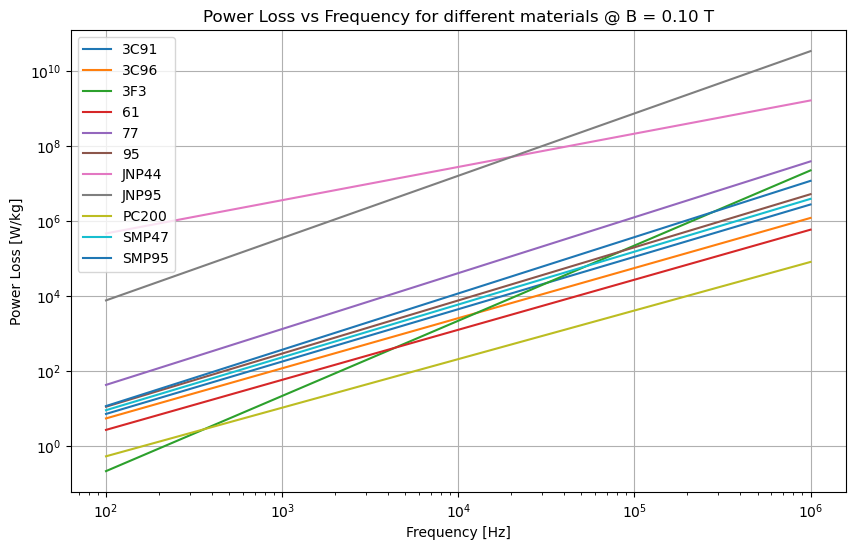

In [262]:
freq = np.logspace(start=2, stop=6, num=10, base=10)
B = 0.1
Ploss = {}

# loop over dataframe rows of df
for index, row in df.iterrows():
    Ploss[row['Material']] = row['k'] * (freq ** row['alpha']) * (B ** row['beta']) 

fig, ax = plt.subplots(figsize=(10, 6))

for mat, Ploss in Ploss.items():
    ax.plot(freq, Ploss, label=f"{mat}")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Power Loss [W/kg]')
ax.set_title('Power Loss vs Frequency for different materials @ B = {:.2f} T'.format(B))
ax.grid(True)
ax.legend()
plt.show()

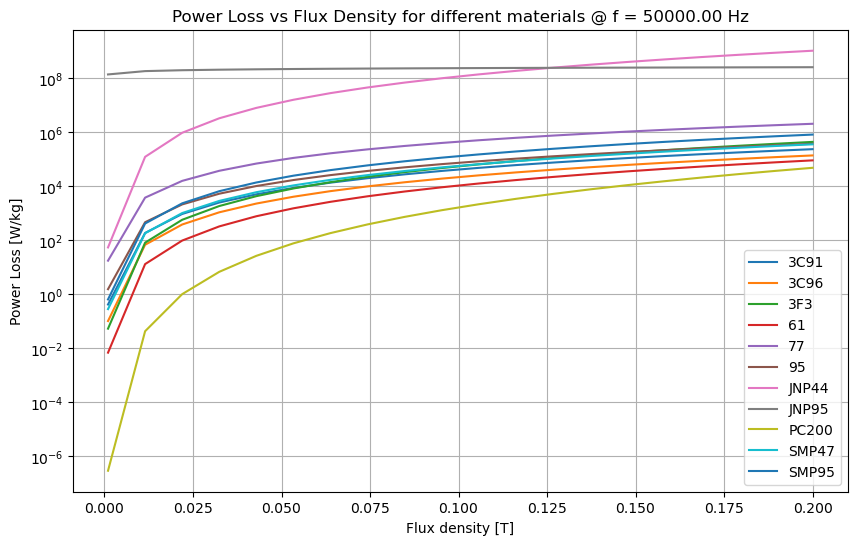

In [263]:
freq = 50e3
B = np.linspace(start=1e-3, stop=0.2, num=20)
Ploss = {}

# loop over dataframe rows of df
for index, row in df.iterrows():
    Ploss[row['Material']] = row['k'] * (freq ** row['alpha']) * (B ** row['beta']) 

fig, ax = plt.subplots(figsize=(10, 6))

for mat, Ploss in Ploss.items():
    ax.plot(B, Ploss, label=f"{mat}")
# ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Flux density [T]')
ax.set_ylabel('Power Loss [W/kg]')
ax.set_title('Power Loss vs Flux Density for different materials @ f = {:.2f} Hz'.format(freq))
ax.grid(True)
ax.legend()
plt.show()

IndexError: index 10 is out of bounds for axis 0 with size 10

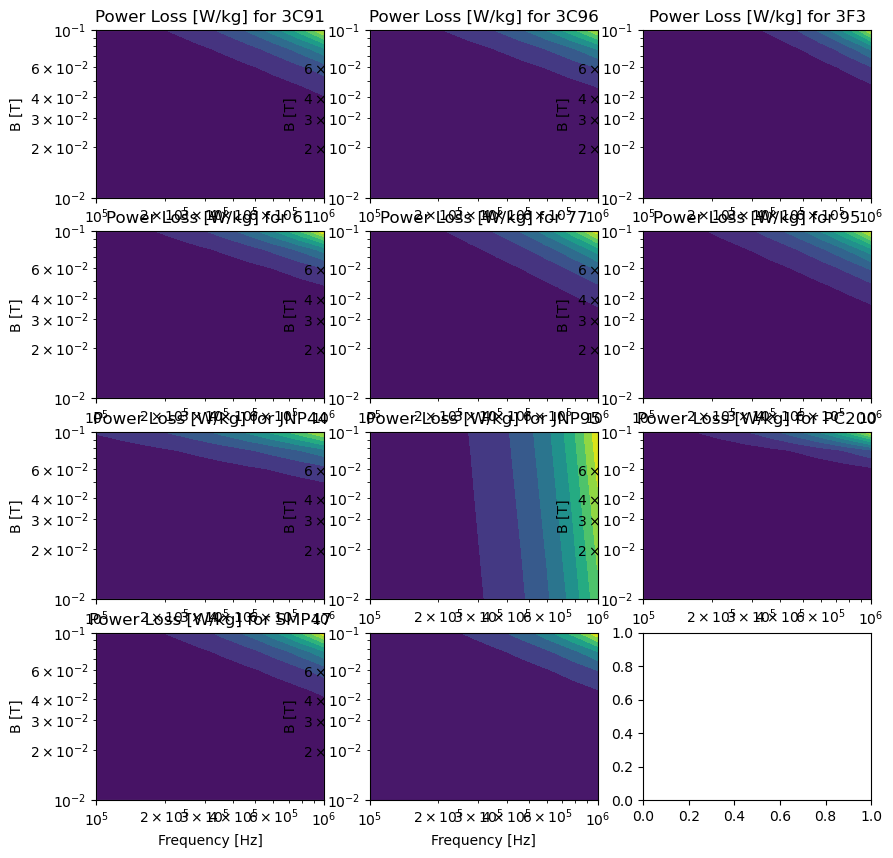

In [264]:
# create a 2D colormap plot with countur lines for core losses based on steinmetz equation
import numpy as np

freq = np.logspace(start=5, stop=6, num=10, base=10)
B = np.logspace(start=-2, stop=-1, num=10, base=10)

X, Y = np.meshgrid(freq, B)

# mat = mat_max_alpha
# mats = [mat_min_alpha, mat_max_alpha, mat_min_beta, mat_max_beta, mat_min_k, mat_max_k]
fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(10, 10))
ax = ax.flatten()

for i, axi in enumerate(ax):
    mat = df.iloc[i]
    Z = mat['k'] * (X ** mat['alpha']) * (Y ** mat['beta'])
    axi.contourf(X, Y, Z, levels=10, cmap='viridis')
    axi.set_xscale('log')
    axi.set_yscale('log')
    axi.set_xlabel('Frequency [Hz]')
    axi.set_ylabel('B [T]')
    axi.set_title('Power Loss [W/kg] for {}'.format(mat['Material'], B[i]))
    axi.grid(True)

plt.tight_layout()
plt.show()


# Appendix: datascience for core materials

In [265]:
# Material properties
l_materials = PyMKF.get_core_materials()
l_materials[0].keys()

dict_keys(['bhCycle', 'coerciveForce', 'curieTemperature', 'density', 'family', 'heatCapacity', 'heatConductivity', 'manufacturerInfo', 'material', 'materialComposition', 'name', 'permeability', 'remanence', 'resistivity', 'saturation', 'type', 'volumetricLosses'])

In [266]:
print("Nr. of cores available: " + str(len(l_materials)))

# l_cores is a list of dictionaries, each dictionary contains the following keys:
all_keys = l_materials[0].keys()
df_materials = pd.DataFrame(columns=all_keys)

for idx, item in enumerate(l_materials):
    df_row = pd.DataFrame([item])
    # filter out all-NA
    df_row = df_row.dropna(how='all')
    df_materials = pd.concat([df_materials, df_row], ignore_index=True)

df_materials = df_materials.set_index('name')
df_materials.head(10)

Nr. of cores available: 215


/tmp/ipykernel_1446/3163535197.py:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_materials = pd.concat([df_materials, df_row], ignore_index=True)


,bhCycle,coerciveForce,curieTemperature,density,family,heatCapacity,heatConductivity,manufacturerInfo,material,materialComposition,permeability,remanence,resistivity,saturation,type,volumetricLosses
name,,,,,,,,,,,,,,,,
3C90,None,"[{'magneticField': 14.0, 'magneticFluxDensity'...",2.20e+02,4.80e+03,3C,"{'excludeMaximum': None, 'excludeMinimum': Non...","{'excludeMaximum': None, 'excludeMinimum': Non...","{'cost': None, 'datasheetUrl': 'https://www.fe...",ferrite,None,"{'amplitude': None, 'complex': None, 'initial'...","[{'magneticField': 0.0, 'magneticFluxDensity':...","[{'temperature': 25.0, 'value': 5.0}]","[{'magneticField': 1200.0, 'magneticFluxDensit...",commercial,"{'default': [{'a': None, 'b': None, 'c': None,..."
3C91,None,"[{'magneticField': 10.0, 'magneticFluxDensity'...",2.20e+02,4.80e+03,3C,"{'excludeMaximum': None, 'excludeMinimum': Non...","{'excludeMaximum': None, 'excludeMinimum': Non...","{'cost': None, 'datasheetUrl': 'https://www.fe...",ferrite,None,"{'amplitude': None, 'complex': None, 'initial'...","[{'magneticField': 0.0, 'magneticFluxDensity':...","[{'temperature': 25.0, 'value': 5.0}]","[{'magneticField': 1200.0, 'magneticFluxDensit...",commercial,"{'default': [{'a': None, 'b': None, 'c': None,..."
3C92,None,"[{'magneticField': 9.0, 'magneticFluxDensity':...",2.70e+02,4.80e+03,3C,"{'excludeMaximum': None, 'excludeMinimum': Non...","{'excludeMaximum': None, 'excludeMinimum': Non...","{'cost': None, 'datasheetUrl': 'https://www.fe...",ferrite,None,"{'amplitude': None, 'complex': None, 'initial'...","[{'magneticField': 0.0, 'magneticFluxDensity':...","[{'temperature': 25.0, 'value': 5.0}]","[{'magneticField': 1200.0, 'magneticFluxDensit...",commercial,"{'default': [{'a': None, 'b': None, 'c': None,..."
3C92A,None,"[{'magneticField': 9.0, 'magneticFluxDensity':...",2.70e+02,4.90e+03,3C,"{'excludeMaximum': None, 'excludeMinimum': Non...","{'excludeMaximum': None, 'excludeMinimum': Non...","{'cost': None, 'datasheetUrl': 'https://www.fe...",ferrite,None,"{'amplitude': None, 'complex': None, 'initial'...","[{'magneticField': 0.0, 'magneticFluxDensity':...","[{'temperature': 25.0, 'value': 5.0}]","[{'magneticField': 1200.0, 'magneticFluxDensit...",commercial,"{'default': [{'a': None, 'b': None, 'c': None,..."
3C94,None,"[{'magneticField': 14.0, 'magneticFluxDensity'...",2.20e+02,4.80e+03,3C,"{'excludeMaximum': None, 'excludeMinimum': Non...","{'excludeMaximum': None, 'excludeMinimum': Non...","{'cost': None, 'datasheetUrl': 'https://www.fe...",ferrite,None,"{'amplitude': None, 'complex': None, 'initial'...","[{'magneticField': 0.0, 'magneticFluxDensity':...","[{'temperature': -20.0, 'value': 10.0}, {'temp...","[{'magneticField': 1200.0, 'magneticFluxDensit...",commercial,"{'default': [{'a': None, 'b': None, 'c': None,..."
3C95,None,"[{'magneticField': 9.0, 'magneticFluxDensity':...",2.15e+02,4.80e+03,3C,"{'excludeMaximum': None, 'excludeMinimum': Non...","{'excludeMaximum': None, 'excludeMinimum': Non...","{'cost': None, 'datasheetUrl': 'https://www.fe...",ferrite,None,"{'amplitude': None, 'complex': None, 'initial'...","[{'magneticField': 0.0, 'magneticFluxDensity':...","[{'temperature': 25.0, 'value': 5.0}]","[{'magneticField': 1200.0, 'magneticFluxDensit...",commercial,"{'default': [{'a': None, 'b': None, 'c': None,..."
3C95A,None,"[{'magneticField': 9.0, 'magneticFluxDensity':...",2.20e+02,4.85e+03,3C,"{'excludeMaximum': None, 'excludeMinimum': Non...","{'excludeMaximum': None, 'excludeMinimum': Non...","{'cost': None, 'datasheetUrl': 'https://www.fe...",ferrite,None,"{'amplitude': None, 'complex': None, 'initial'...","[{'magneticField': 0.0, 'magneticFluxDensity':...","[{'temperature': 25.0, 'value': 10.0}]","[{'magneticField': 1200.0, 'magneticFluxDensit...",commercial,"{'default': [{'a': None, 'b': None, 'c': None,..."
3C95F,None,"[{'magneticField': 9.0, 'magneticFluxDensity':...",2.10e+02,4.85e+03,3C,"{'excludeMaximum': None, 'excludeMinimum': Non...","{'excludeMaximum': None, 'excludeMinimum': Non...",

In [267]:
print("Nr of material families: " + str(len(df_materials['family'].unique())))
print("Family unique values: " + str(df_materials['family'].unique()))

Nr of material families: 36
Family unique values: ['3C' '3F' '4F' 'NiZn' '75-Series' 'MnZn' 'A' 'DMR' 'Edge' 'FS' 'GX' 'HF'
 'High DC Bias Edge' 'High DC Bias XFlux' 'High Flux' 'JNP' 'Kool Mµ'
 'Kool Mµ Hƒ' 'Kool Mµ MAX' 'Kool Mµ Ultra' 'MP' 'MPP' 'MS' 'Mix' 'N' 'OC'
 'OD' 'OE' 'OP' 'PC' 'SH' 'SM' 'SMP' 'TP' 'XFlux' 'XFlux Ultra']


In [268]:
# Define a custom function to concatenate strings
def concat_strings(series):
    return ', '.join(series.dropna().astype(str))

def concat_unique_strings(series):
    return ', '.join(pd.Series(series.dropna().unique()))

agg_funcs = {'curieTemperature': ['mean', 'std'],
             'density': ['mean', 'std'],
             'material': concat_unique_strings,
             'family': 'count'
             }

df_all_mats_steinmetz = df_materials.groupby('family').agg(agg_funcs).reset_index()
# df.columns = ['_'.join(col).strip() if type(col) is tuple else col for col in df.columns.values]
# df = df.rename(columns={'family_count': 'nr_of_components_same_family'})
# df = df.set_index('family')

# rename sub-column name of family column
df_all_mats_steinmetz.columns = pd.MultiIndex.from_tuples(
    [('family', 'name') if col == ('family', '') else col for col in df_all_mats_steinmetz.columns]
)
df_all_mats_steinmetz

family curieTemperature           density           \
                  name             mean      std     mean      std   
0                   3C         2.36e+02 2.87e+01 4.82e+03 3.34e+01   
1                   3F         2.32e+02 3.40e+01 4.74e+03 2.50e+01   
2                   4F         2.60e+02      NaN 4.60e+03      NaN   
3            75-Series         7.00e+02 0.00e+00      NaN      NaN   
4                    A         1.30e+02      NaN 4.90e+03      NaN   
5                  DMR         2.22e+02 1.06e+01 4.90e+03 0.00e+00   
6                 Edge         5.00e+02 0.00e+00      NaN      NaN   
7                   FS         5.00e+02 0.00e+00 6.50e+03 5.40e+02   
8                   GX         5.00e+02 0.00e+00 7.68e+03 1.77e+02   
9                   HF         5.00e+02 0.00e+00 7.02e+03 6.28e+02   
10   High DC Bias Edge         5.00e+02 0.00e+00      NaN      NaN   
11  High DC Bias XFlux         5.00e+02 0.00e+00      NaN      NaN   
12           High Flux         5.00e+02 0.00e+00      NaN      NaN   
13                 JNP         2.18e+02 2.89e+00 4.89e+03 2.50e+01   
14             Kool Mµ         5.00e+02 0.00e+00      NaN      NaN   
15          Kool Mµ Hƒ         5.00e+02 0.00e+00      NaN      NaN   
16         Kool Mµ MAX         5.00e+02 0.00e+00      NaN      NaN   
17       Kool Mµ Ultra         5.00e+02 0.00e+00      NaN      NaN   
18                  MP         5.00e+02 0.00e+00 7.36e+03 7.94e+02   
19                 MPP         4.60e+02 0.00e+00      NaN      NaN   
20                  MS         5.00e+02 0.00e+00 5.63e+03 3.90e+02   
21                 Mix         5.00e+02 0.00e+00 6.19e+03 8.42e+02   
22                MnZn         2.26e+02 3.42e+01 4.80e+03 0.00e+00   
23                   N         2.20e+02 3.41e+01 4.82e+03 5.44e+01   
24                NiZn         3.75e+02 1.06e+02 4.80e+03 0.00e+00   
25                  OC         5.00e+02 0.00e+00 6.70e+03 3.00e+02   
26                  OD         5.00e+02 0.00e+00 6.90e+03 4.26e+02   
27                  OE         5.00e+02 0.00e+00 6.23e+03 2.41e+02   
28                  OP         5.00e+02 0.00e+00 6.58e+03 6.44e+02   
29                  PC         2.42e+02 3.40e+01 4.90e+03 0.00e+00   
30                  SH         5.00e+02 0.00e+00 5.41e+03 2.82e+02   
31                  SM         5.00e+02 0.00e+00 6.10e+03 4.38e+02   
32                 SMP         2.22e+02 8.02e+00 4.84e+03 5.18e+01   
33                  TP         2.15e+02      NaN 4.80e+03      NaN   
34               XFlux         7.00e+02 0.00e+00      NaN      NaN   
35         XFlux Ultra         7.00e+02 0.00e+00      NaN      NaN   

                material family  
   concat_unique_strings  count  
0                ferrite     12  
1                ferrite      4  
2                ferrite      1  
3                 powder      3  
4                ferrite      1  
5                ferrite      2  
6                 powder      8  
7                 powder      6  
8                 powder      2  
9                 powder      8  
10                powder      2  
11                powder      3  
12                powder      8  
13               ferrite      4  
14                powder      7  
15                powder      5  
16                powder      7  
17                powder      3  
18                powder      8  
19                powder     14  
20                powder      9  
21                powder     28  
22               ferrite      7  
23               ferrite     12  
24               ferrite      2  
25                powder      5  
26                powder      4  
27                powder      5  
28                powder      7  
29               ferrite      3  
30                powder      4  
31                powder      3  
32               ferrite      8  
33               ferrite      1  
34                powder      7  
35                powder      2

/tmp/ipykernel_1446/2738886879.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


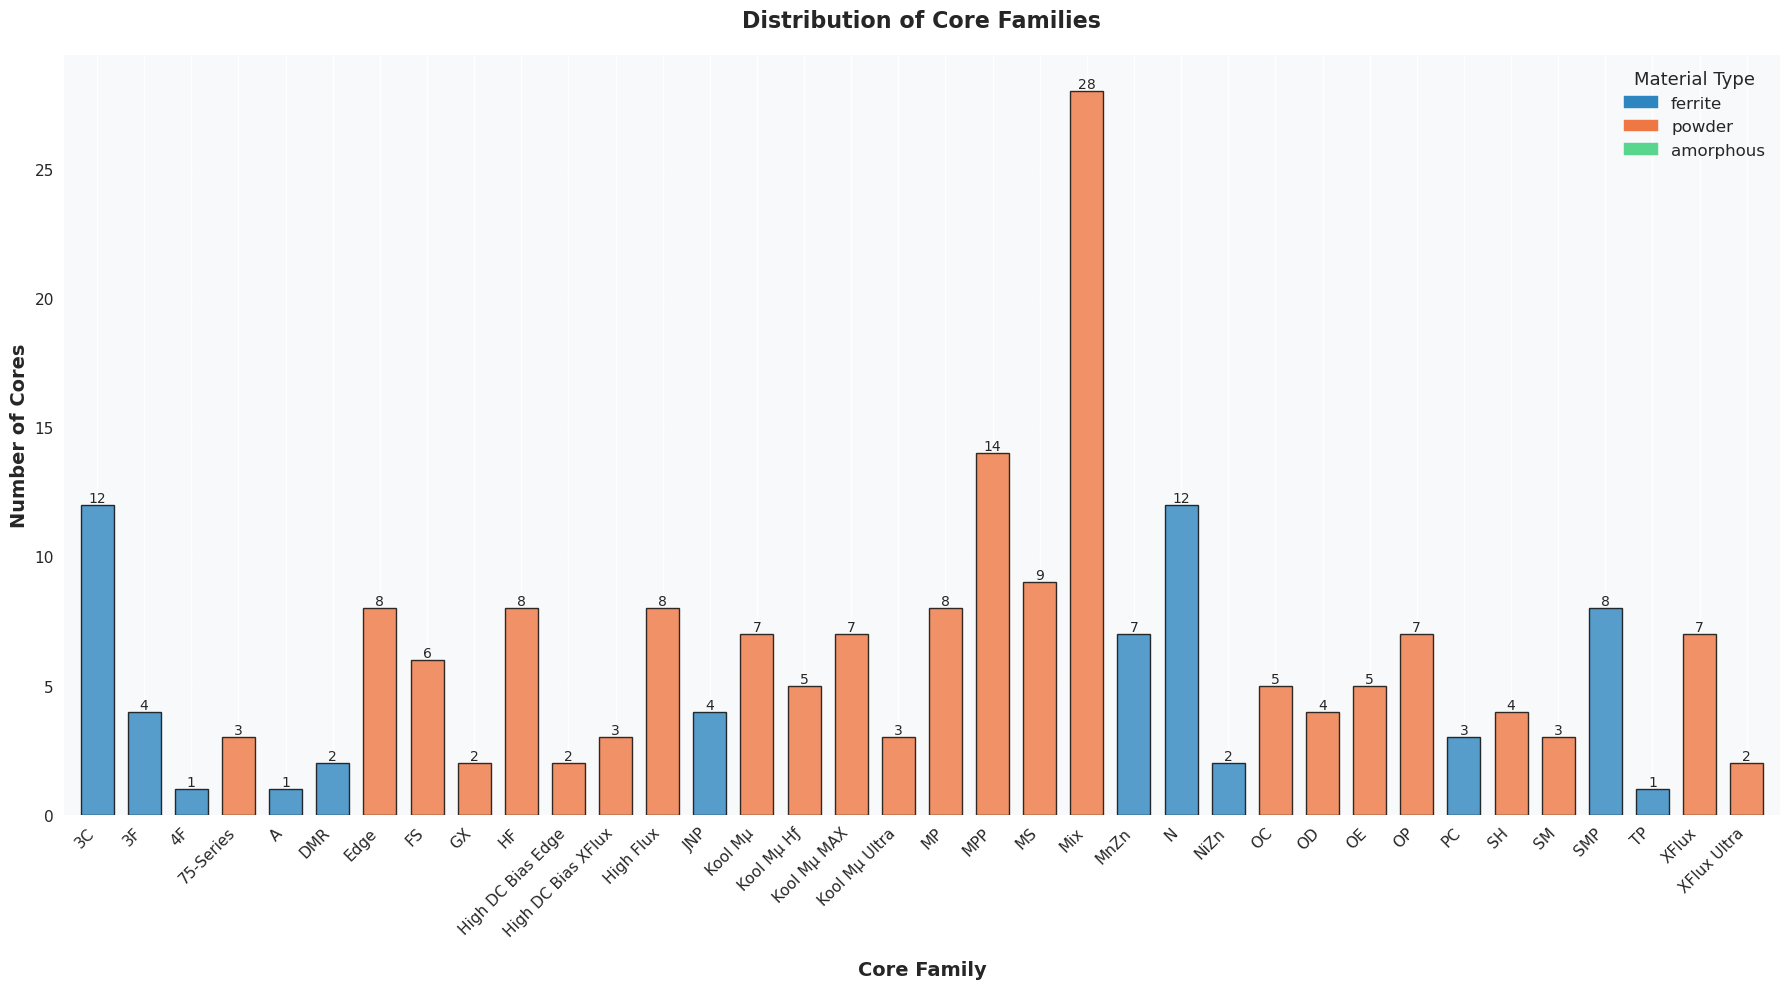

In [269]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
plt.style.use('seaborn')
sns.set_palette("deep")

# Create figure and axis with larger figsize
fig, ax = plt.subplots(figsize=(18, 10))

# Get the data sorted by frequency
data = df_all_mats_steinmetz

# define color of bar based on the df_materials['material']
color_dict = {'ferrite': '#2E86C1',
              'powder': '#E74',
              'amorphous': '#58D68D'}

# Create bar plot with customizations
bars = ax.bar(data[('family', 'name')], data[('family', 'count')], 
              color=[color_dict[mat] for mat in data[('material', 'concat_unique_strings')]],  # Custom color for each bar
              width=0.7,  # Adjust bar width
              edgecolor='black',  # Add edge color
              linewidth=1,  # Edge line width
              alpha=0.8)  # Slight transparency

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}',
            ha='center', va='bottom',
            fontsize=10)

# Add a legend
legend_labels = [plt.Rectangle((0,0),1,1, color=color) for color in color_dict.values()]
ax.legend(legend_labels, color_dict.keys(), title='Material Type', title_fontsize='13', fontsize='12', loc='upper right')

# Customize the axes
ax.set_xlabel('Core Family', fontsize=14, fontweight='bold', labelpad=15)
ax.set_ylabel('Number of Cores', fontsize=14, fontweight='bold')
ax.set_title('Distribution of Core Families', fontsize=16, fontweight='bold', pad=20)

# Customize tick labels
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(fontsize=11)

# Customize grid
ax.grid(axis='y', linestyle='--', alpha=0.3)
ax.set_axisbelow(True)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add a subtle background color
ax.set_facecolor('#f8f9fa')

# Adjust margins and layout
plt.margins(x=0.01)  # Reduce spacing between bars
plt.tight_layout()

plt.show()

/tmp/ipykernel_1446/1465808588.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
/home/tinix84/miniconda3/envs/icm/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/tinix84/miniconda3/envs/icm/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/tinix84/miniconda3/envs/icm/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_c

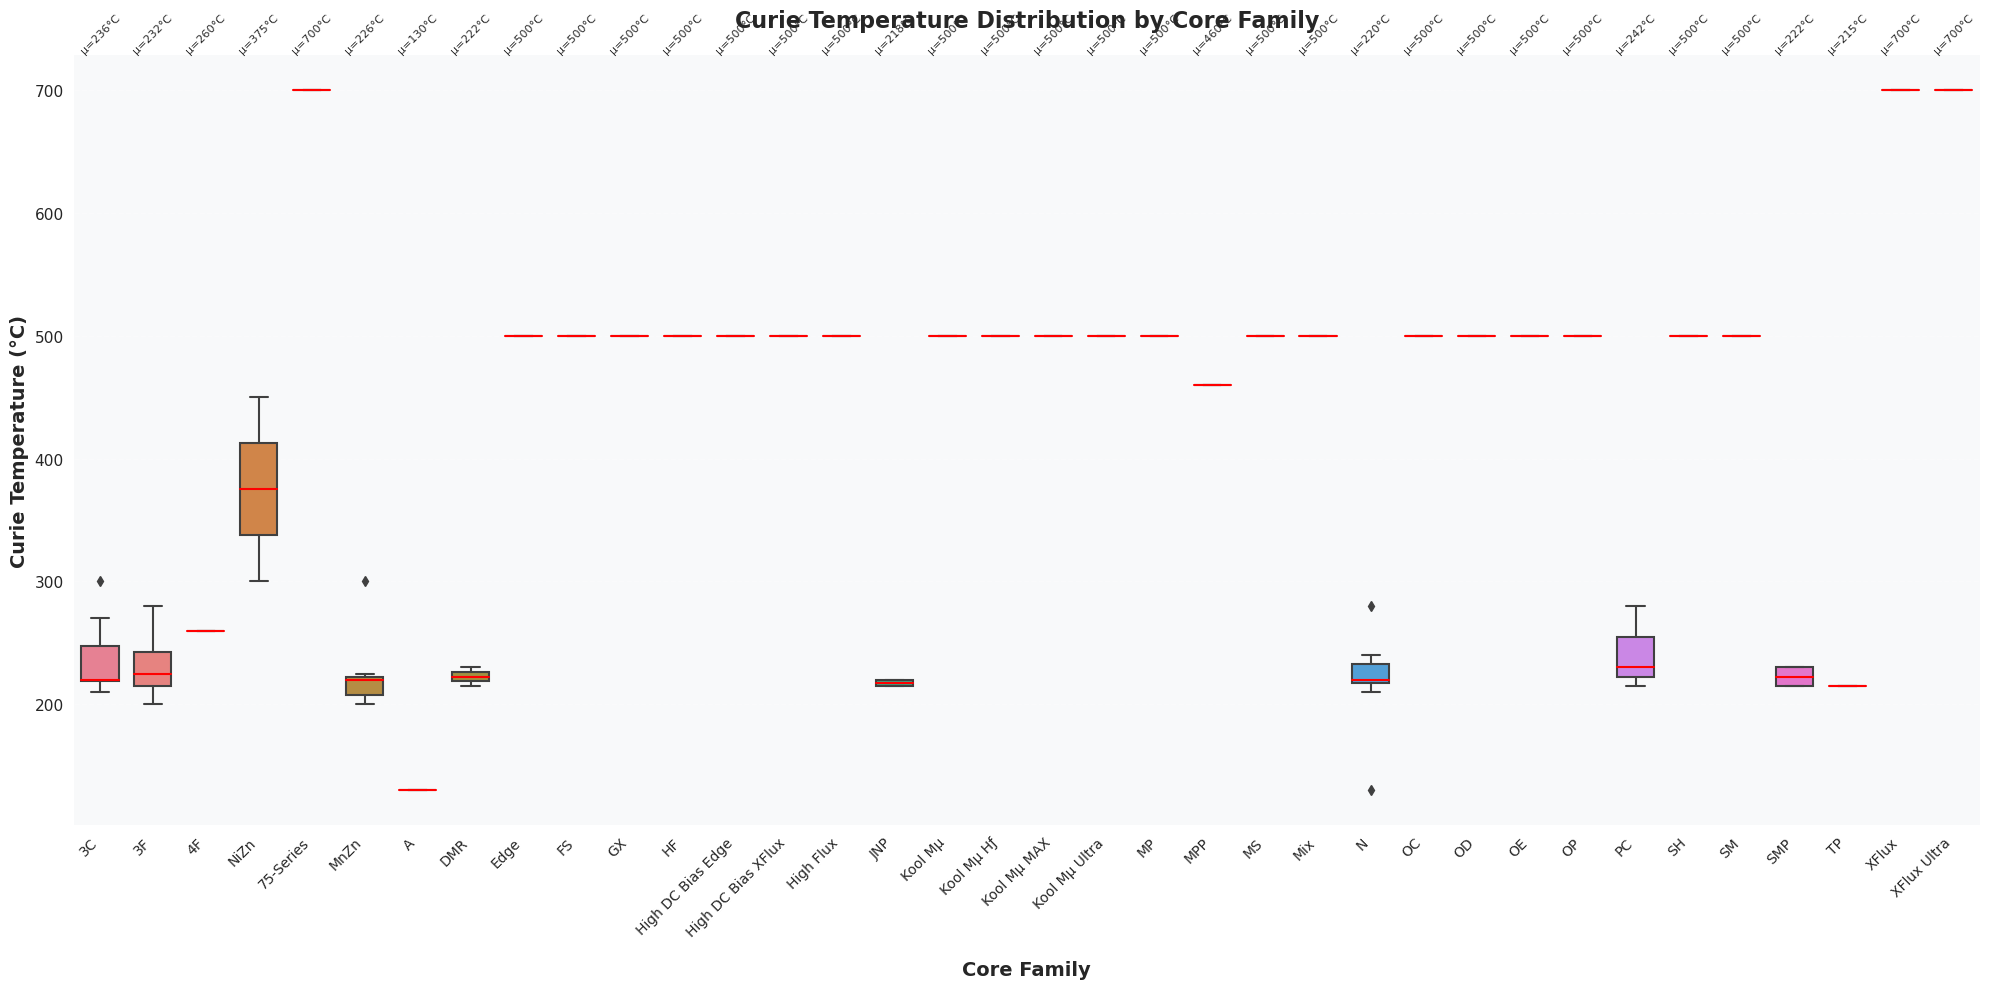

In [270]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style and color palette
plt.style.use('seaborn')
custom_palette = sns.color_palette("husl", n_colors=len(df_materials['family'].unique()))

# Create figure and axis
fig, ax = plt.subplots(figsize=(20, 10))

# Create boxplot with enhanced styling
sns.boxplot(x='family', y='curieTemperature', data=df_materials,
            palette=custom_palette,
            width=0.7,
            fliersize=5,
            linewidth=1.5,
            medianprops={"color": "red", "linewidth": 1.5},
            ax=ax)

# Customize the axes
ax.set_xlabel('Core Family', fontsize=14, fontweight='bold', labelpad=15)
ax.set_ylabel('Curie Temperature (°C)', fontsize=14, fontweight='bold')
ax.set_title('Curie Temperature Distribution by Core Family', 
             fontsize=16, fontweight='bold', pad=20)

# Customize tick labels
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=11)

# Add horizontal gridlines only
ax.yaxis.grid(True, linestyle='--', alpha=0.3)
ax.set_axisbelow(True)

# Remove top and right spines
sns.despine()

# Set background colors
ax.set_facecolor('#f8f9fa')
fig.patch.set_facecolor('white')

# Add statistical annotations (optional)
# You can add mean values or other statistics on top of boxes
for i, family in enumerate(df_materials['family'].unique()):
    mean_val = df_materials[df_materials['family'] == family]['curieTemperature'].mean()
    ax.text(i, ax.get_ylim()[1], f'μ={mean_val:.0f}°C', 
            ha='center', va='bottom', fontsize=8, rotation=45)

# Adjust layout to prevent label cutoff
plt.tight_layout()

plt.show()

/tmp/ipykernel_1446/3539009458.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
/home/tinix84/miniconda3/envs/icm/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/tinix84/miniconda3/envs/icm/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/tinix84/miniconda3/envs/icm/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_c

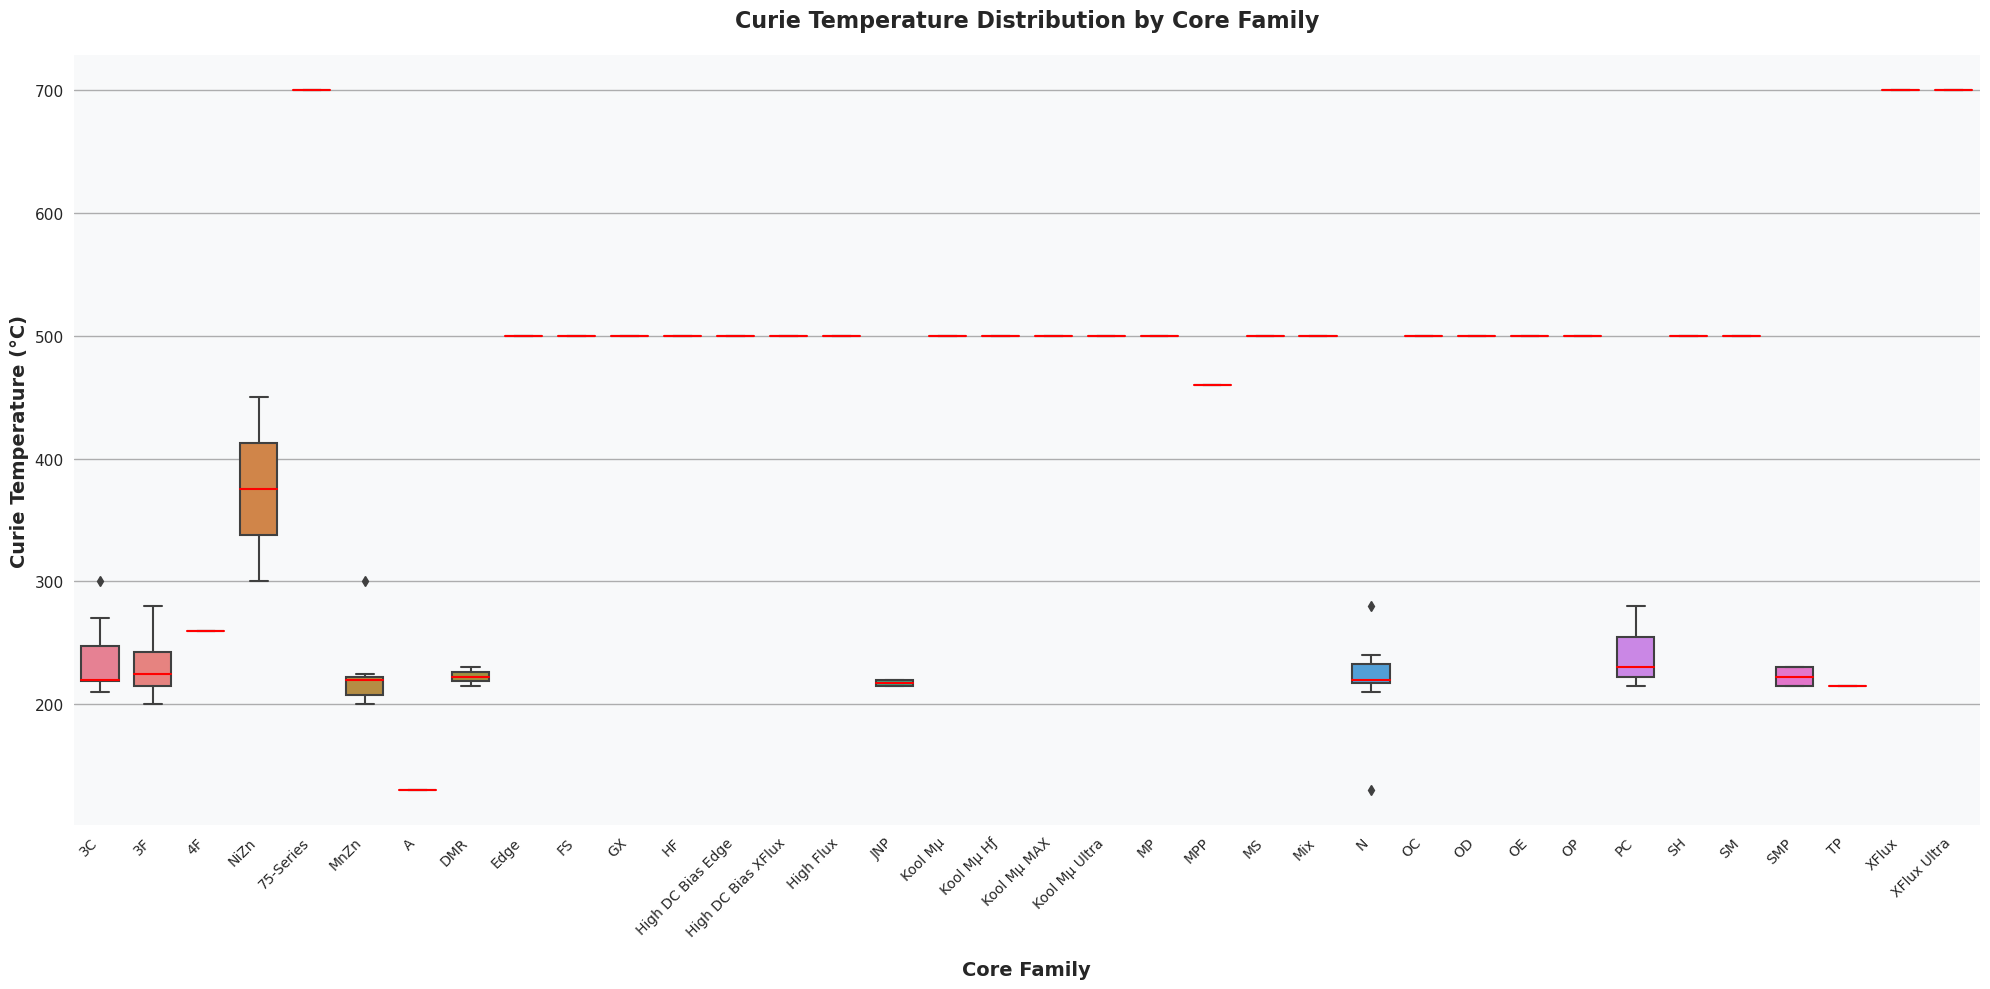

In [271]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style and color palette
plt.style.use('seaborn')
custom_palette = sns.color_palette("husl", n_colors=len(df_materials['family'].unique()))

# Create figure and axis
fig, ax = plt.subplots(figsize=(20, 10))

# Create boxplot with enhanced styling
sns.boxplot(x='family', y='curieTemperature', data=df_materials,
            palette=custom_palette,
            width=0.7,
            fliersize=5,
            linewidth=1.5,
            medianprops={"color": "red", "linewidth": 1.5},
            ax=ax)

# Customize the axes
ax.set_xlabel('Core Family', fontsize=14, fontweight='bold', labelpad=15)
ax.set_ylabel('Curie Temperature (°C)', fontsize=14, fontweight='bold')
ax.set_title('Curie Temperature Distribution by Core Family', 
             fontsize=16, fontweight='bold', pad=20)

# Customize tick labels
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=11)

# Add horizontal gridlines only
ax.yaxis.grid(True, linestyle='-', alpha=0.3, color='black')
ax.set_axisbelow(True)

# Remove top and right spines
sns.despine()

# Set background colors
ax.set_facecolor('#f8f9fa')
fig.patch.set_facecolor('white')

# # Add statistical annotations (optional)
# # You can add mean values or other statistics on top of boxes
# for i, family in enumerate(df_materials['family'].unique()):
#     mean_val = df_materials[df_materials['family'] == family]['curieTemperature'].mean()
#     ax.text(i, ax.get_ylim()[1], f'μ={mean_val:.0f}°C', 
#             ha='center', va='bottom', fontsize=8, rotation=45)

# Adjust layout to prevent label cutoff
plt.tight_layout()

plt.show()

/tmp/ipykernel_1446/4151930612.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


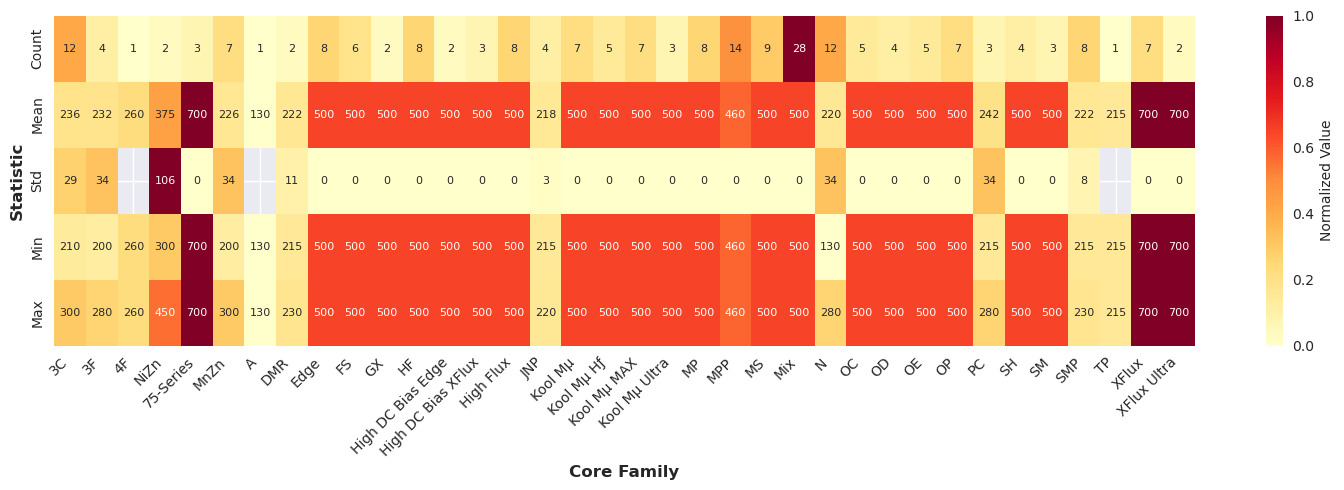

In [272]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Set the style and color palette
plt.style.use('seaborn')
custom_palette = sns.color_palette("husl", n_colors=len(df_materials['family'].unique()))

# Create figure with two subplots: one for boxplot, one for heatmap
fig, ax_heat = plt.subplots(1, 1, figsize=(15, 5),)

# Calculate statistics for each family
families = df_materials['family'].unique()
stats_dict = {
    'Count': [],
    'Mean': [],
    'Std': [],
    'Min': [],
    'Max': []
}

for family in families:
    family_data = df_materials[df_materials['family'] == family]['curieTemperature']
    stats_dict['Count'].append(len(family_data))
    stats_dict['Mean'].append(family_data.mean())
    stats_dict['Std'].append(family_data.std())
    stats_dict['Min'].append(family_data.min())
    stats_dict['Max'].append(family_data.max())

# Create stats DataFrame
stats_df = pd.DataFrame(stats_dict, index=families)

# Normalize the values for better visualization
norm_stats = stats_df.copy()
for col in norm_stats.columns:
    norm_stats[col] = (norm_stats[col] - norm_stats[col].min()) / (norm_stats[col].max() - norm_stats[col].min())

# Create heatmap
sns.heatmap(norm_stats.T, 
            ax=ax_heat, 
            cmap='YlOrRd', 
            annot=stats_df.T.round(1), fmt='.0f',
            cbar_kws={'label': 'Normalized Value'},
            annot_kws={'size': 8})

# Customize heatmap
ax_heat.set_xticklabels(ax_heat.get_xticklabels(), rotation=45, ha='right')
ax_heat.set_ylabel('Statistic', fontsize=12, fontweight='bold')
ax_heat.set_xlabel('Core Family', fontsize=12, fontweight='bold')

# Add colorbar label
cbar = ax_heat.collections[0].colorbar
cbar.set_label('Normalized Value', fontsize=10)

plt.tight_layout()
plt.show()

# analysis of the material by manufacturer

In [273]:
df_materials_manufacturer = df_materials['manufacturerInfo']
# expand manufacturerInfo column into multiple columns based on dict keys
df_materials_manufacturer = df_materials_manufacturer.apply(pd.Series)
# df_materials_manufacturer['manufacturer'] = df_materials['manufacturerInfo']
df_materials_manufacturer

,cost,datasheetUrl,family,name,orderCode,reference,status
name,,,,,,,
3C90,None,https://www.ferroxcube.com/upload/media/produc...,None,Ferroxcube,None,None,None
3C91,None,https://www.ferroxcube.com/upload/media/produc...,None,Ferroxcube,None,None,None
3C92,None,https://www.ferroxcube.com/upload/media/produc...,None,Ferroxcube,None,None,None
3C92A,None,https://www.ferroxcube.com/upload/media/produc...,None,Ferroxcube,None,None,None
3C94,None,https://www.ferroxcube.com/upload/media/produc...,None,Ferroxcube,None,None,None
...,...,...,...,...,...,...,...
XFlux 60,None,https://www.mag-inc.com/Products/Powder-Cores/...,None,Magnetics,None,None,None
XFlux 75,None,https://www.mag-inc.com/Products/Powder-Cores/...,None,Magnetics,None,None,None
XFlux 90,None,https://www.mag-inc.com/Products/Powder-Cores/...,None,Magnetics,None,None,None


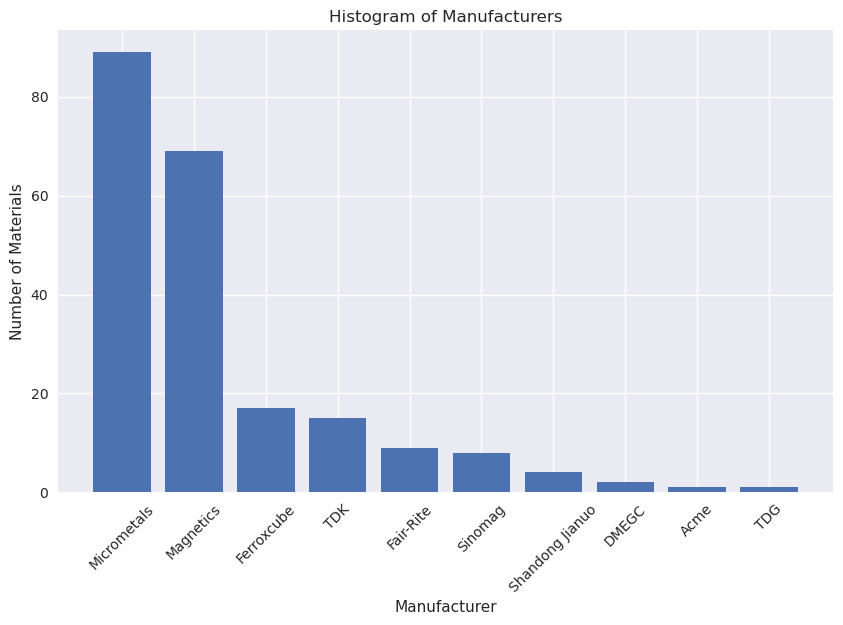

In [274]:
# plot the cores histogram based on manufacturer values in df_materials_manufacturer['name']
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(df_materials_manufacturer['name'].value_counts().index, df_materials_manufacturer['name'].value_counts().values)
ax.set_xlabel('Manufacturer')
ax.set_ylabel('Number of Materials')
ax.set_title('Histogram of Manufacturers')
ax.xaxis.set_tick_params(rotation=45)
ax.grid(True)
plt.show()

# analysis of the material by permeability/temperature

In [275]:
df_materials_feat = df_materials['permeability']
# expand manufacturerInfo column into multiple columns based on dict keys
df_materials_feat = df_materials_feat.apply(pd.Series)
df_materials_feat

,amplitude,complex,initial
name,,,
3C90,None,None,"[{'frequency': 10000.0, 'magneticFieldDcBias':..."
3C91,None,None,"[{'frequency': 10000.0, 'magneticFieldDcBias':..."
3C92,None,None,"[{'frequency': 10000.0, 'magneticFieldDcBias':..."
3C92A,None,None,"[{'frequency': 10000.0, 'magneticFieldDcBias':..."
3C94,None,None,"[{'frequency': 10000.0, 'magneticFieldDcBias':..."
...,...,...,...
XFlux 60,None,None,"{'frequency': None, 'magneticFieldDcBias': Non..."
XFlux 75,None,None,"{'frequency': None, 'magneticFieldDcBias': Non..."
XFlux 90,None,None,"{'frequency': None, 'magneticFieldDcBias': Non..."


In [276]:
data = pd.DataFrame(df_materials_feat.iloc[0]['initial'])
data

,frequency,magneticFieldDcBias,magneticFluxDensityPeak,modifiers,temperature,tolerance,value
0,1.00e+04,None,None,None,-4.00e+01,None,1.42e+03
1,1.00e+04,None,None,None,-3.00e+01,None,1.50e+03
2,1.00e+04,None,None,None,-2.00e+01,None,1.63e+03
3,1.00e+04,None,None,None,-1.00e+01,None,1.76e+03
4,1.00e+04,None,None,None,0.00e+00,None,1.91e+03
5,1.00e+04,None,None,None,1.00e+01,None,2.07e+03
6,1.00e+04,None,None,None,2.00e+01,None,2.25e+03
7,1.00e+04,None,None,None,3.00e+01,None,2.48e+03
8,1.00e+04,None,None,None,4.00e+01,None,2.71e+03
9,1.00e+04,None,None,None,5.00e+01,None,2.94e+03


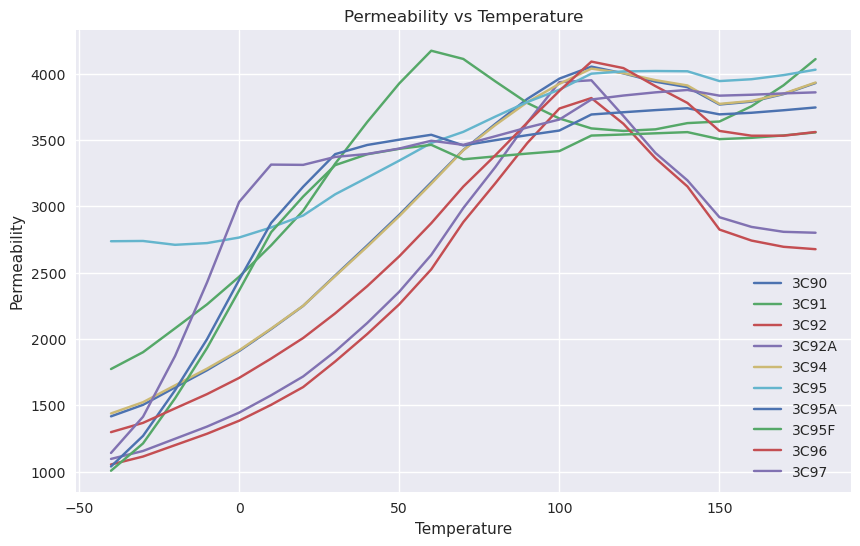

In [277]:
# plot permeability vs frequency vs temperature
fig, ax = plt.subplots(figsize=(10, 6))
for idx in range(0, 10):
    data = pd.DataFrame(df_materials_feat.iloc[idx]['initial'])
    name = df_materials_feat.index[idx]
    ax.plot(data['temperature'], data['value'], label=name)

ax.set_xlabel('Temperature')
ax.set_ylabel('Permeability')
ax.set_title('Permeability vs Temperature')
ax.legend()
ax.grid(True)
plt.show()
